In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

In [7]:
#Импортируйте данные в окружение Jupyter Notebook.
df_data=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Данные')
df_clients=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Clients')
df_region=pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Region_dict')

KeyboardInterrupt: 

In [8]:
#проверяем где есть пустые ячейки - 3 столбца
df_data.info()
df_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38691 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     38691 non-null  int64  
 1   id_client    38103 non-null  float64
 2   amt_payment  36536 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000


In [9]:
#проверяем где есть пустые ячейки -1 столбец
df_clients.info()
df_clients.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015


In [10]:
#проверяем где есть пустые ячейки - их нет.
df_region.info()
df_region.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


In [11]:
#проверьте их на наличие пустых значений.
print(len(df_data[df_data['id_client'].isnull()]))
print(len(df_data[df_data['amt_payment'].isnull()]))
print(len(df_data[df_data['dtime_pay'].isnull()]))
print(len(df_clients[df_clients['dtime_ad'].isnull()]))

588
2155
2172
249


In [12]:
#очищаем данные
df_data = df_data[~((df_data['id_client'].isnull())|(df_data['amt_payment'].isnull())|(df_data['dtime_pay'].isnull()))]
df_clients= df_clients[~((df_clients['dtime_ad'].isnull()))]

In [13]:
#проверяем
len(df_data)

36519

In [14]:
df_data

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000
...,...,...,...,...
38686,283582,185826.0,3702.0,2022-08-22 02:22:41.588000
38687,174414,187403.0,3284.0,2022-10-01 14:35:56.818000
38688,113060,184674.0,3708.0,2022-07-17 10:23:57.530000
38689,218517,208436.0,1983.0,2022-11-12 17:05:48.765000


In [15]:
#проверяем
len(df_clients)

55356

In [16]:
#постройте группировку по количеству в каждом городе. Добавлена сортировка по возрастанию.

df_region_gr = df_region.groupby('city').count()['id_trading_point'].reset_index().sort_values(by='id_trading_point', ascending = False)


In [17]:
df_region_gr.head()

,city,id_trading_point
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5


<function matplotlib.pyplot.show(close=None, block=None)>

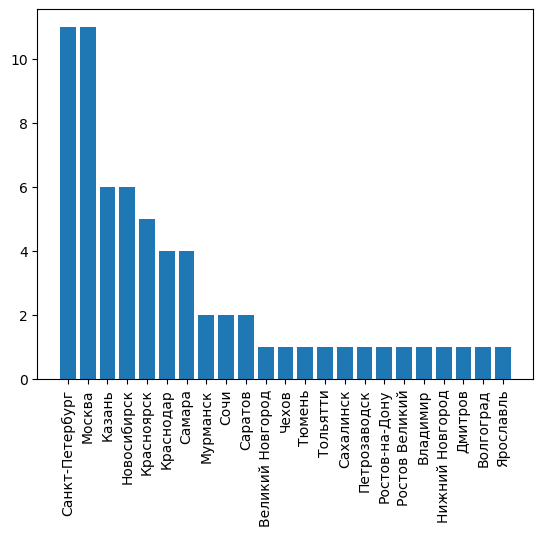

In [18]:
#визуализация с помощью гистограммы
plt.bar(df_region_gr['city'], df_region_gr['id_trading_point'])
plt.xticks (rotation = 90)
plt.show

In [19]:
#Соедините (по клиенту) сгруппированную таблицу с платежами с клиентской таблицей.
#С помощью словаря регионов подтяните к каждой торговой точке город, в котором она находится.
df = df_data.merge(df_clients, on = 'id_client', how = 'outer')
df = df.merge(df_region, on = 'id_trading_point')

In [20]:
df_cl = df.groupby(['id_client', 'id_trading_point', 'city']).agg({'id_order':'count', 'amt_payment':'sum'}).reset_index()

In [21]:
df_cl

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [22]:
#2.1.Постройте агрегацию таблицы с платежами, где вычислите сумму платежей на каждого клиента.
#df_data_gr = df_data.groupby(['id_client', 'id_order']).sum()['amt_payment'].reset_index()
df_fin = df_cl.merge(df_clients[['id_client', 'dtime_ad', 'nflag_test']], on = 'id_client')

In [23]:
#Заполните нулями суммы покупок тех клиентов, которые их не совершали
df_fin['amt_payment'] = df_fin['amt_payment'].fillna(0)

In [24]:
#Создайте поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет
df_fin['flag_pay']=np.where(df_fin['amt_payment']>0,1,0)

In [25]:
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,flag_pay
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


In [26]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    if p < alpha:
        print("Гипотеза H0 не подтверждаетсяЖ средние не равны: средние не равны")
        print("Разница средних = ", r1.mean()-r2.mean())
    else:
        print("Гипотеза H0 подтверждается: средние равны")
        print("Разница средних = 0")
    return s, p

In [27]:
def mann_whithey_func(r1,r2, alpha = .05):
    s,p = mannwhitneyu(r1,r2)
   
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    return s,p

In [28]:
# Очищаем ТТ
# 4.1.  Создайте пустой список. Запустите цикл по 
#всем торговым точкам и добавьте к этому списку все торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом.

zero_payment = []
for i in df_fin ['id_trading_point'].unique():
        sum_a =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==0)].sum()['amt_payment'].sum()
        sum_b =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==1)].sum()['amt_payment'].sum()
        if(sum_a==0)|(sum_b==0):
            zero_payment.append(i)  

C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3315599037.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3315599037.py:8: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3315599037.py:7: FutureWarning: The default v

In [29]:
print(*zero_payment)
print(len(zero_payment))

26.0 739.0 866.0 46.0 1099.0 1015.0 603.0 810.0 800.0 228.0 1.0 13.0 23.0 4.0 7.0
15


In [30]:
# 4.2. Создайте еще один пустой список. Запустите цикл по всем торговым точкам и добавьте к этому списку все торговые точки, в которых пустует или контрольная, или тестовая группа.
zero_client = [] 
for i in df_fin ['id_trading_point'].unique():
        c_a =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==0)]['id_client'].count()
        c_b =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin ['nflag_test']==1)]['id_client'].count()
        if(c_a==0)|(c_b==0):
            zero_client.append(i) 

In [31]:
print(*zero_client)
print(len(zero_client))

739.0 866.0 1099.0 1015.0 603.0 810.0 800.0 228.0
8


In [32]:
#5.1. Отбросьте все торговые точки, которые были вами обнаружены в пункте 4.
df_fin = df_fin[~df_fin['id_trading_point'].isin(zero_payment+zero_client)]

In [33]:
df_fin

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,flag_pay
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
6,178567.0,453.0,Санкт-Петербург,1,2663.0,2022-06-03 03:02:56.855,0,1
7,178568.0,3786.0,Москва,3,13537.0,2022-06-03 03:05:33.476,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


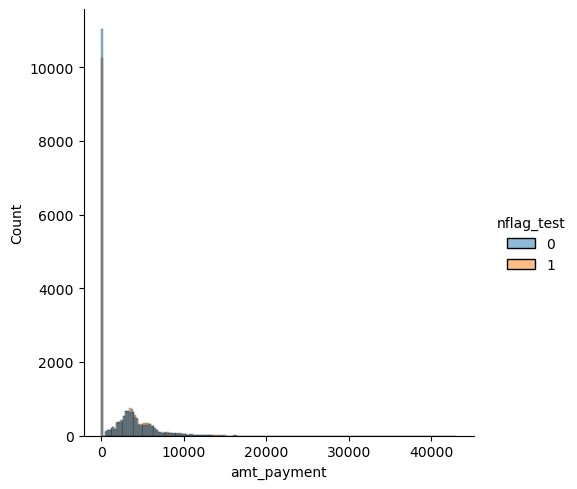

In [34]:
#5.2. Изобразите гистограмму платежей, на которой различными цветами изображены группы “тест” и “контроль”. 
sns.displot(df_fin, x = 'amt_payment', hue = 'nflag_test')
plt.show()

In [35]:
#5.3. Примените функцию test_calc и сделайте вывод (сравниваем средние платежи)
test_calc(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])

Гипотеза H0 не подтверждаетсяЖ средние не равны: средние не равны
Разница средних =  158.91123610796285


(5.663915722973564, 1.488511135509387e-08)

In [36]:
#5.4. Примените функцию test_calc и сделайте вывод (сравниваем конверсию в платеж, то есть r1 и r2 - это ряды нулей и единиц, в зависимости от того, оплатил ли что-то клиент или нет).
test_calc(df_fin[df_fin['flag_pay']==1]['amt_payment'],df_fin[df_fin['flag_pay']==0]['amt_payment'])

Гипотеза H0 не подтверждаетсяЖ средние не равны: средние не равны
Разница средних =  4470.867077025453


(239.13888396720586, 0.0)

In [37]:
#5.5. Примените функцию mann_whitney_func и сделайте вывод.
mann_whithey_func(df_fin[df_fin['nflag_test']==1]['amt_payment'],df_fin[df_fin['nflag_test']==0]['amt_payment'])


Распределения не равны


(264700600.0, 1.246458969497137e-09)

In [38]:
#6.1.1. Повторите аналитику из пункта 4 в отношении Москвы. Сделайте выводы.
zero_payment_moscow = []
for i in df_fin ['id_trading_point'].unique():
        mosc =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin['city']=="Москва")]['amt_payment'].sum()
        if(mosc!=0):
            zero_payment_moscow.append(i)  
print(*zero_payment_moscow)
print(len(zero_payment_moscow))

2652.0 3786.0 1287.0 1654.0 3987.0 2212.0 8543.0 6543.0 9121.0 1002.0 9931.0
11


In [39]:
#6.2.1. Повторите аналитику из пункта 4 в отношении Санкт-Петербурга. Сделайте выводы.
zero_payment_spb = []
for i in df_fin ['id_trading_point'].unique():
        spb =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin['city']=="Санкт-Петербург")]['amt_payment'].sum()
        if(spb!=0):
            zero_payment_spb.append(i)  
print(*zero_payment_spb)
print(len(zero_payment_spb))

453.0 112.0 117.0 309.0 576.0 900.0 213.0 801.0 573.0 891.0 394.0
11


In [40]:
#6.3.1. Запустите цикл по оставшимся городам. Проведите такой же анализ
zero_payment_oth = []
for i in df_fin ['id_trading_point'].unique():
        oth =  df_fin[(df_fin ['id_trading_point']==i)&(df_fin['city']!="Москва")&(df_fin['city']!="Санкт-Петербург")]['amt_payment'].sum()
        if(oth!=0):
            zero_payment_oth.append(i)  
print(*zero_payment_oth)
print(len(zero_payment_oth))

80.0 88.0 11.0 55.0 212.0 477.0 439.0 33.0 66.0 277.0 202.0 54.0 72.0 444.0 1101.0 544.0 699.0 1989.0 991.0 34.0 2.0 35.0 19.0 516.0 278.0 82.0 36.0 69.0 73.0
29


In [41]:
df_result= pd.DataFrame() #что это значит?
for i in df_fin['city'].unique():
    df_loc = df_fin[df_fin['city']==i]
    
    for j in df_loc['id_trading_point'].unique():
        df_loc_f = df_loc[df_loc['id_trading_point']==j]
        
        count_test = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_control = len(df_loc_f[df_loc_f['nflag_test']==0]) 
        count_all = count_test + count_control
        sigma_test = df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'].std()
        sigma_control = df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'].std()
        avg_payment_test = np.mean(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'])
        avg_payment_control = np.mean(df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        diff= avg_payment_test - avg_payment_control
        
        s_a, p_a = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'],df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        s_p, p_p = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['flag_pay'],df_loc_f[df_loc_f['nflag_test']==0]['flag_pay'])
        
        
        df_result = df_result.append({'city':i, 'id_trading_point':j
                                           ,'count_test':count_test,'count_control':count_control, 'count_all':count_all,
                                           'avg_payment_test':avg_payment_test, 'avg_payment_control':avg_payment_control, 'diff':diff,
                                           'sigma_test':sigma_test, 'sigma_control':sigma_control,
                                           'ttest_s':s_a, 'pvalue_ttest_s':s_p, 'ttest_p':p_a}, ignore_index=True)

Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза

C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза

C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'city':i, 'id_trading_point':j
C:\Users\Irenicus\AppData\Local\Temp\ipykernel_11712\3803308010.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [42]:
df_result['percent_count'] = (df_result['count_all']/df_result['count_all']).sum()

In [43]:
df_result['nflag_diff'] = np.where((df_result['ttest_p'] < .05) & (df_result['diff'] > 0), 'Positive'
                                , np.where((df_result['ttest_p'] < .05) & (df_result['diff'] < 0), 'Negative', 'No diff'))

In [44]:
df_result.head(10)

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest_s,pvalue_ttest_s,ttest_p,percent_count,nflag_diff
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,0.728421,0.524039,51.0,No diff
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,-1.039726,0.072152,51.0,No diff
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,-0.033579,0.951932,51.0,No diff
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,-0.492541,0.270564,51.0,No diff
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,-0.944088,0.279901,51.0,No diff
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,0.787685,0.493948,51.0,No diff
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,-0.058097,0.644024,51.0,No diff
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,-0.044896,0.843562,51.0,No diff
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,2.713820,0.045918,51.0,Positive
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,1.088194,0.700671,51.0,No diff


In [48]:
pip install XlsxWriter

^C
Note: you may need to restart the kernel to use updated packages.


In [50]:
writer = pd.ExcelWriter('Калькулятор АВ теста.xlsx.', engine = 'xlsxwriter')

df_result[df_result['nflag_diff']=='Positive'].to_excel(writer, sheet_name = 'Положительные исходы', index = False)
df_result[df_result['nflag_diff']=='Negative'].to_excel(writer, sheet_name = 'Отрицательные исходы', index = False)
df_result[df_result['nflag_diff']=='No diff'].to_excel(writer, sheet_name = 'Нейтральные исходы', index = False)
writer.close()